In [1]:
# Importing all the necessary libraries required for the project
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os


# Using the mnist data set of hand written digit
# No need to download the csv file!!
mnist = tf.keras.datasets.mnist
# Loading the data and splitting it into train and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Initially we had values ranging from 0 to 255z
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
# After normalising the data we will have values ranging from 0 to 1
# Normalising makes the computation faster


# We will use Sequential Model 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train,y_train,epochs = 3)

model.save('handwritten.model')

2023-01-07 18:06:36.957213: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-07 18:06:37.512756: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/azeem/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-01-07 18:06:37.512789: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-07 18:06:39.067363: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerro

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2690 - accuracy: 0.9211
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1095 - accuracy: 0.9664
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0751 - accuracy: 0.9761


INFO:tensorflow:Assets written to: handwritten.model/assets


INFO:tensorflow:Assets written to: handwritten.model/assets


In [2]:
loss, accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0870 - accuracy: 0.9746


1/1 [==============================] - 0s 82ms/step
This number is probably 0


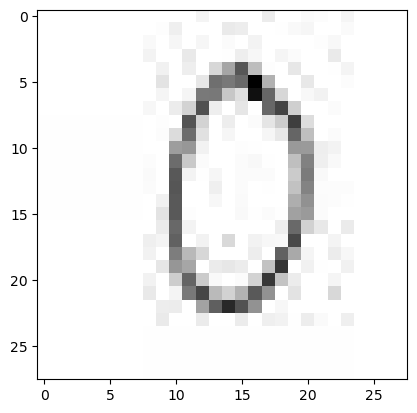

1/1 [==============================] - 0s 20ms/step
This number is probably 8


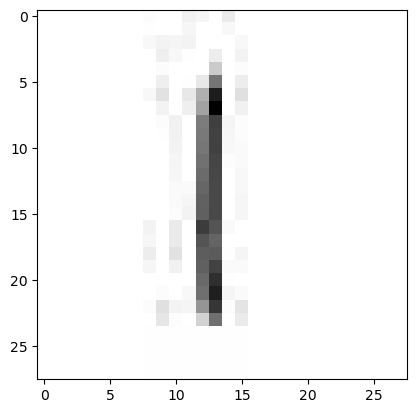

1/1 [==============================] - 0s 19ms/step
This number is probably 2


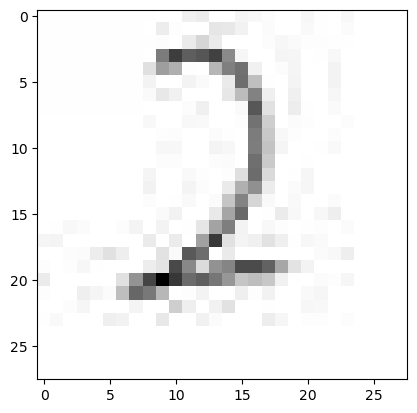

1/1 [==============================] - 0s 22ms/step
This number is probably 5


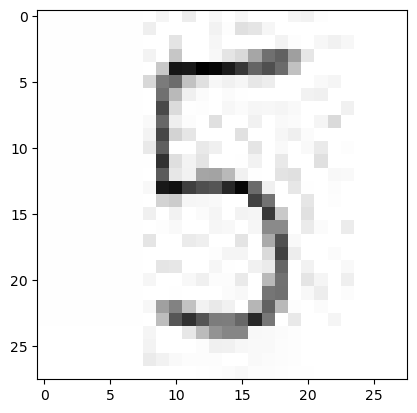

1/1 [==============================] - 0s 21ms/step
This number is probably 8


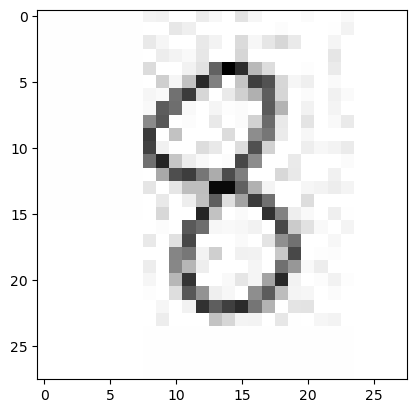

1/1 [==============================] - 0s 20ms/step
This number is probably 1


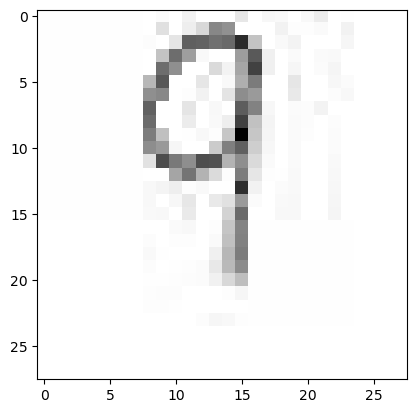

In [3]:
image_number = 0
while os.path.isfile(f"digits/digit{image_number}.jpg"):
    try:
        img = cv2.imread(f"digits/digit{image_number}.jpg")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print("This number is probably", np.argmax(prediction))
        plt.imshow(img[0], cmap = plt.cm.binary)
        plt.show()
    except:
        print("error")
    finally:
        image_number += 1
